In [35]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import make_interp_spline

In [2]:
train_data = pd.read_csv("data/train_sequences.csv")
train_labels = pd.read_csv("data/train_labels.csv")

In [39]:
seq = train_data.iloc[2]["sequence"]
id = train_data.iloc[2]["target_id"]
train_labels.head()


,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793


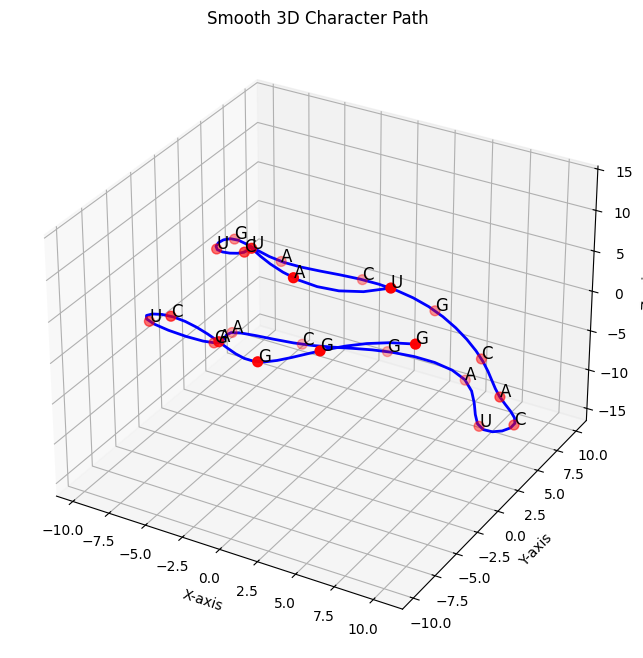

In [40]:
def plot_3d_characters(characters, coordinates, smooth_factor=100):
    x_vals = np.array([coord[0] for coord in coordinates])
    y_vals = np.array([coord[1] for coord in coordinates])
    z_vals = np.array([coord[2] for coord in coordinates])
    
    t = np.linspace(0, 1, len(coordinates)) 
    t_smooth = np.linspace(0, 1, smooth_factor) 
    
    spline_x = make_interp_spline(t, x_vals, k=3)(t_smooth)
    spline_y = make_interp_spline(t, y_vals, k=3)(t_smooth)
    spline_z = make_interp_spline(t, z_vals, k=3)(t_smooth)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x_vals, y_vals, z_vals, c='red', marker='o', s=50, label="Characters")

    ax.plot(spline_x, spline_y, spline_z, color='blue', linewidth=2, linestyle='-')

    for char, (x, y, z) in zip(characters, coordinates):
        ax.text(x, y, z, char, fontsize=12, color='black')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('Smooth 3D Character Path')

    plt.show()

characters = ['A', 'B', 'C', 'D', 'E']
coordinates = [(1,2,3), (4,5,6), (7,8,9), (2,3,1), (5,1,7)]

characters = []
coordinates = []
for idx, i in enumerate(seq):
    characters.append(i)
    coordinates.append((train_labels[train_labels["ID"] == id+"_"+str(idx+1)]["x_1"].item()
                        , train_labels[train_labels["ID"] == id+"_"+str(idx+1)]["y_1"].item(), 
                        train_labels[train_labels["ID"] == id+"_"+str(idx+1)]["z_1"].item()))
plot_3d_characters(characters, coordinates)